# ROY Predictions #

In [1]:
# -*- coding: utf-8 -*-#
"""
Created by MinhKhang Nguyen
August 8 2021 9:54 PM
"""

'\nCreated by MinhKhang Nguyen\nAugust 8 2021 9:54 PM\n'

In [2]:
import pandas as pd 
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

#### Importing Data ####

In [3]:
html_url = "https://www.basketball-reference.com/leagues/NBA_2021_rookies-season-stats.html"
rookie_tables = pd.read_html(html_url, header=1)
len(rookie_tables)
rookie = rookie_tables[0]
rookie.head(25)

,Rk,Player,Debut,Age,Yrs,G,MP,FG,FGA,3P,...,TOV,PF,PTS,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1
0,1,Precious Achiuwa,"Dec 23, '20, MIA @ ORL",21,1,61,737,124,228,0,...,43,91,304,.544,.000,.509,12.1,5.0,3.4,0.5
1,2,Ty-Shon Alexander,"Dec 27, '20, PHO @ SAC",22,1,15,47,3,12,2,...,3,2,9,.250,.222,.500,3.1,0.6,0.7,0.4
2,3,Cole Anthony,"Dec 23, '20, ORL vs. MIA",20,1,47,1273,219,552,58,...,106,98,605,.397,.337,.832,27.1,12.9,4.7,4.1
3,4,Deni Avdija,"Dec 23, '20, WAS @ PHI",20,1,54,1257,130,312,53,...,33,140,342,.417,.315,.644,23.3,6.3,4.9,1.2
4,5,Udoka Azubuike,"Dec 23, '20, UTA @ POR",21,1,15,57,4,9,0,...,3,9,16,.444,NaN,.800,3.8,1.1,0.9,0.0
5,6,LaMelo Ball,"Dec 23, '20, CHO @ CLE",19,1,51,1469,293,672,92,...,145,136,803,.436,.352,.758,28.8,15.7,5.9,6.1
6,7,Desmond Bane,"Dec 23, '20, MEM vs. SAS",22,1,68,1519,234,499,117,...,59,125,625,.469,.432,.816,22.3,9.2,3.1,1.7
7,8,Saddiq Bey,"Dec 26, '20, DET vs. CLE",21,1,70,1909,279,691,175,...,60,110,857,.404,.380,.844,27.3,12.2,4.5,1.4
8,9,Tyler Bey,"Jan 13, '21, DAL @ CHO",22,1,18,71,7,22,1,...,3,6,18,.318,.250,.600,3.9,1.0,1.1,0.2
9,10,Keljin Blevins,"Dec 23, '20, POR vs. UTA",25,1,17,75,5,20,2,...,5,8,12,.250,.250,NaN,4.4,0.7,0.6,0.2


In [4]:
rookie.columns

Index(['Rk', 'Player', 'Debut', 'Age', 'Yrs', 'G', 'MP', 'FG', 'FGA', '3P',
       '3PA', 'FT', 'FTA', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'FG%', '3P%', 'FT%', 'MP.1', 'PTS.1', 'TRB.1', 'AST.1'],
      dtype='object')

#### Cleaning DataFrame ####

In [5]:
#renames columns to strings only#
rookie.rename(
    columns={
        '3P': 'TP',
        '3PA': 'TPA',
        'FG%': 'FGP',
        '3P%': 'TPP',
        'FT%': 'FTP',
        'MP.1': 'MPG',
        'PTS.1': 'PPG',
        'TRB.1': 'RPG',
        'AST.1': 'APG',
    }, inplace=True)

#removing duplicate players (stats of players that played on different teams)#
rookie.drop_duplicates(subset=['Player'], keep=False, inplace=True)

#Dropping "Rk" Column#
rookie.drop('Rk', axis=1, inplace=True)

#replacing NaN with 0#
rookie.fillna(0, inplace=True)

rookie.head(25)

,Player,Debut,Age,Yrs,G,MP,FG,FGA,TP,TPA,...,TOV,PF,PTS,FGP,TPP,FTP,MPG,PPG,RPG,APG
0,Precious Achiuwa,"Dec 23, '20, MIA @ ORL",21,1,61,737,124,228,0,1,...,43,91,304,.544,.000,.509,12.1,5.0,3.4,0.5
1,Ty-Shon Alexander,"Dec 27, '20, PHO @ SAC",22,1,15,47,3,12,2,9,...,3,2,9,.250,.222,.500,3.1,0.6,0.7,0.4
2,Cole Anthony,"Dec 23, '20, ORL vs. MIA",20,1,47,1273,219,552,58,172,...,106,98,605,.397,.337,.832,27.1,12.9,4.7,4.1
3,Deni Avdija,"Dec 23, '20, WAS @ PHI",20,1,54,1257,130,312,53,168,...,33,140,342,.417,.315,.644,23.3,6.3,4.9,1.2
4,Udoka Azubuike,"Dec 23, '20, UTA @ POR",21,1,15,57,4,9,0,0,...,3,9,16,.444,0,.800,3.8,1.1,0.9,0.0
5,LaMelo Ball,"Dec 23, '20, CHO @ CLE",19,1,51,1469,293,672,92,261,...,145,136,803,.436,.352,.758,28.8,15.7,5.9,6.1
6,Desmond Bane,"Dec 23, '20, MEM vs. SAS",22,1,68,1519,234,499,117,271,...,59,125,625,.469,.432,.816,22.3,9.2,3.1,1.7
7,Saddiq Bey,"Dec 26, '20, DET vs. CLE",21,1,70,1909,279,691,175,460,...,60,110,857,.404,.380,.844,27.3,12.2,4.5,1.4
8,Tyler Bey,"Jan 13, '21, DAL @ CHO",22,1,18,71,7,22,1,4,...,3,6,18,.318,.250,.600,3.9,1.0,1.1,0.2
9,Keljin Blevins,"Dec 23, '20, POR vs. UTA",25,1,17,75,5,20,2,8,...,5,8,12,.250,.250,0,4.4,0.7,0.6,0.2


#### Filtering DataFrame ####

In [6]:
rookie[['G','MP','FG','FGA','TP','TPA','FT','FTA','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','FGP','TPP','FTP','MPG','PPG','RPG','APG']] = rookie[['G','MP','FG','FGA','TP','TPA','FT','FTA','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','FGP','TPP','FTP','MPG','PPG','RPG','APG']].apply(pd.to_numeric)

In [7]:
rookie.drop(rookie[rookie['G'] <= 30].index, inplace = True)
rookie.drop(rookie[rookie['TP'] <= 0.1].index, inplace = True)
rookie.drop(rookie[rookie['TPA'] <= 0.1].index, inplace = True)
rookie.drop(rookie[rookie['TPP'] <= 0.1].index, inplace = True)
rookie.drop(rookie[rookie['PTS'] <= 8].index, inplace = True)

In [8]:
rookie.drop(['Debut','Yrs','MP','ORB','TRB','AST','PTS'], axis=1, inplace=True)

In [9]:
rookie

,Player,Age,G,FG,FGA,TP,TPA,FT,FTA,STL,BLK,TOV,PF,FGP,TPP,FTP,MPG,PPG,RPG,APG
2,Cole Anthony,20,47,219,552,58,172,109,131,30,18,106,98,0.397,0.337,0.832,27.1,12.9,4.7,4.1
3,Deni Avdija,20,54,130,312,53,168,29,45,32,15,33,140,0.417,0.315,0.644,23.3,6.3,4.9,1.2
5,LaMelo Ball,19,51,293,672,92,261,125,165,81,18,145,136,0.436,0.352,0.758,28.8,15.7,5.9,6.1
6,Desmond Bane,22,68,234,499,117,271,40,49,41,16,59,125,0.469,0.432,0.816,22.3,9.2,3.1,1.7
7,Saddiq Bey,21,70,279,691,175,460,124,147,52,14,60,110,0.404,0.380,0.844,27.3,12.2,4.5,1.4
13,Facundo Campazzo,29,65,120,315,76,216,80,91,79,14,73,132,0.381,0.352,0.879,21.9,6.1,2.1,3.6
22,Anthony Edwards,19,72,505,1211,171,520,211,272,82,36,160,129,0.417,0.329,0.776,32.1,19.3,4.7,2.9
25,Malachi Flynn,22,47,127,340,54,168,45,56,38,7,43,68,0.374,0.321,0.804,19.7,7.5,2.5,2.9
30,Josh Green,20,39,42,93,4,25,13,23,16,3,17,35,0.452,0.160,0.565,11.4,2.6,2.0,0.7
32,Tyrese Haliburton,20,58,292,619,121,296,48,56,77,28,92,83,0.472,0.409,0.857,30.1,13.0,3.0,5.3


#### Processing the Data ####

In [10]:
for index, row in rookie.iterrows():
    rookie.loc[index, "ROY Score"] = (row['PPG']+row['RPG']+(row['STL']/row['G'])+row['APG']+(row['BLK']/row['G'])-(row['TOV']/row['G'])-((row['FGA']-row['FG'])/row['G'])) * (row['PPG']+row['RPG']+(row['STL']/row['G'])+(0.5*(row['APG']))+(0.5*(row['BLK']/row['G']))-((row['FGA']-row['FG'])/row['G'])-(row['TOV']/row['G'])-((row['FTA']-row['FT'])/row['G'])-(0.5*(row['FG'])/row['G']))

#NBA Efficiency Metric = (Points)+(Rebounds)+(Steals)+(Assists)+(Blocked Shots)-(Turnovers)-(Missed Shots)#
#Win Score = (Points)+(Rebounds)+(Steals)+(½Assists)+(½Blocked Shots)-(Field Goal Attempts)-(Turnovers)-½(Free Throw Attempts)-½Personal Fouls#
#My equation = (((FG%*3P%*FT%)NBA Efficiency))(Win Score)#

In [11]:
rookie.sort_values(by=['ROY Score'], ascending=False, inplace=True)
roy = rookie.copy()
roy['ROY Score'] = round(roy['ROY Score'],2)
roy['SPG'] = round(roy['STL']/roy['G'],1)
roy['BLKG'] = round(roy['BLK']/roy['G'],1)
roy['TOVG'] = round(roy['TOV']/roy['G'],1)
roy['PFG'] = round(roy['PF']/roy['G'],1)
roy['FG%'] = roy['FGP']*100
roy['3P%'] = roy['TPP']*100
roy['FT%'] = roy['FTP']*100
roy.drop(['FG','FGA','TP','TPA','FT','FTA','STL','BLK','TOV','PF','FGP','TPP','FTP'], axis=1, inplace=True)

roy.rename(
    columns={
        'MPG': 'MP',
        'PPG': 'PTS',
        'RPG': 'REB',
        'APG': 'AST',
        'SPG': 'STL',
        'BLKG': 'BLK',
        'TOVG': 'TOV',
        'PFG': 'PF',
    }, inplace=True)

roy.head(15)

,Player,Age,G,MP,PTS,REB,AST,ROY Score,STL,BLK,TOV,PF,FG%,3P%,FT%
5,LaMelo Ball,19,51,28.8,15.7,5.9,6.1,241.76,1.6,0.4,2.8,2.7,43.6,35.2,75.8
22,Anthony Edwards,19,72,32.1,19.3,4.7,2.9,172.66,1.1,0.5,2.2,1.8,41.7,32.9,77.6
32,Tyrese Haliburton,20,58,30.1,13.0,3.0,5.3,164.26,1.3,0.5,1.6,1.4,47.2,40.9,85.7
89,Jae'Sean Tate,25,70,29.2,11.3,5.3,2.5,159.26,1.2,0.5,1.4,3.2,50.6,30.8,69.4
88,Isaiah Stewart,19,68,21.4,7.9,6.7,0.9,143.53,0.6,1.3,1.0,2.7,55.3,33.3,69.6
55,Kenyon Martin,20,45,23.7,9.3,5.4,1.1,127.11,0.7,0.9,0.8,2.0,50.9,36.5,71.4
100,James Wiseman,19,39,21.4,11.5,5.8,0.7,118.78,0.3,0.9,1.5,3.1,51.9,31.6,62.8
7,Saddiq Bey,21,70,27.3,12.2,4.5,1.4,112.90,0.7,0.2,0.9,1.6,40.4,38.0,84.4
2,Cole Anthony,20,47,27.1,12.9,4.7,4.1,111.62,0.6,0.4,2.3,2.1,39.7,33.7,83.2
97,Patrick Williams,19,71,27.9,9.2,4.6,1.4,94.79,0.9,0.6,1.4,1.8,48.3,39.1,72.8


#### Visualization ####

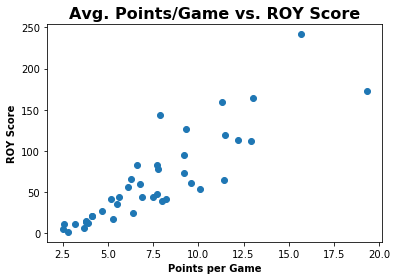

In [12]:
x = roy['PTS']
y = roy['ROY Score']

plt.scatter(x, y)
plt.title('Avg. Points/Game vs. ROY Score', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Points per Game', fontdict={'fontweight':'bold'})
plt.ylabel('ROY Score', fontdict={'fontweight':'bold'})
plt.show()

In [13]:
#plt.savefig('Win Shares vs. MVP Score.png')

In [14]:
roy.set_index(['Player', 'Age', 'G', 'MP','FG%', '3P%', 'FT%', 'TOV', 'PF', 'REB', 'AST', 'STL', 'BLK', 'PTS', 'ROY Score'], inplace=True)
roy = roy.head(15)
roy

,,,,,,,,,,,,,,
Player,Age,G,MP,FG%,3P%,FT%,TOV,PF,REB,AST,STL,BLK,PTS,ROY Score
LaMelo Ball,19,51,28.8,43.6,35.2,75.8,2.8,2.7,5.9,6.1,1.6,0.4,15.7,241.76
Anthony Edwards,19,72,32.1,41.7,32.9,77.6,2.2,1.8,4.7,2.9,1.1,0.5,19.3,172.66
Tyrese Haliburton,20,58,30.1,47.2,40.9,85.7,1.6,1.4,3.0,5.3,1.3,0.5,13.0,164.26
Jae'Sean Tate,25,70,29.2,50.6,30.8,69.4,1.4,3.2,5.3,2.5,1.2,0.5,11.3,159.26
Isaiah Stewart,19,68,21.4,55.3,33.3,69.6,1.0,2.7,6.7,0.9,0.6,1.3,7.9,143.53
Kenyon Martin,20,45,23.7,50.9,36.5,71.4,0.8,2.0,5.4,1.1,0.7,0.9,9.3,127.11
James Wiseman,19,39,21.4,51.9,31.6,62.8,1.5,3.1,5.8,0.7,0.3,0.9,11.5,118.78
Saddiq Bey,21,70,27.3,40.4,38.0,84.4,0.9,1.6,4.5,1.4,0.7,0.2,12.2,112.90
Cole Anthony,20,47,27.1,39.7,33.7,83.2,2.3,2.1,4.7,4.1,0.6,0.4,12.9,111.62


#### Exporting ####

###### ROY Table to CSV ######

In [15]:
#roy.to_csv("MVP Predictions.csv")#